In [1]:
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint

In [2]:
torch.__version__

'2.2.1+cu121'

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cpu')

In [3]:
import numpy as np
import pandas as pd

# Load the data
with open('pg.txt', 'r') as file:
    text = file.read()

# Convert the text into a list of characters
chars = list(text)

# Convert to lowercase
chars = [char.lower() for char in chars]

# Filter out non-alphabet characters
chars = [char for char in chars if char.isalpha()]

# Randomly shuffle the characters
np.random.shuffle(chars)

# Build the vocabulary of characters and mappings to/from integers
chars_unique = sorted(list(set(chars)))
stoi = {s:i+1 for i,s in enumerate(chars_unique)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

# Convert characters to integers
sequences = [stoi[char] for char in chars]

# Create sequences and labels
seq_length = 100
inputs = []
labels = []
for i in range(0, len(sequences) - seq_length, 1):
    inputs.append(sequences[i:i + seq_length])
    labels.append(sequences[i + seq_length])

# Convert to numpy arrays
inputs = np.array(inputs)
labels = np.array(labels)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assume `inputs` and `labels` are your preprocessed data
# Convert labels to one-hot vectors
labels = to_categorical(labels, num_classes=len(stoi))

# Split the data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(inputs, labels, test_size=0.1, random_state=42)

# Model Building
model = Sequential()
model.add(Embedding(input_dim=len(stoi), output_dim=50, input_length=seq_length))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(len(stoi), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training
model.fit(train_inputs, train_labels, validation_data=(val_inputs, val_labels), epochs=10, verbose=2)

Epoch 1/10
1108/1108 - 7s - loss: 2.9189 - accuracy: 0.1206 - val_loss: 2.8996 - val_accuracy: 0.1374 - 7s/epoch - 6ms/step
Epoch 2/10
1108/1108 - 3s - loss: 2.8539 - accuracy: 0.1368 - val_loss: 2.9570 - val_accuracy: 0.1173 - 3s/epoch - 3ms/step
Epoch 3/10
1108/1108 - 3s - loss: 2.6850 - accuracy: 0.1817 - val_loss: 3.0883 - val_accuracy: 0.0894 - 3s/epoch - 3ms/step
Epoch 4/10
1108/1108 - 5s - loss: 2.3253 - accuracy: 0.2873 - val_loss: 3.3800 - val_accuracy: 0.0810 - 5s/epoch - 4ms/step
Epoch 5/10
1108/1108 - 4s - loss: 1.8009 - accuracy: 0.4491 - val_loss: 3.8967 - val_accuracy: 0.0724 - 4s/epoch - 4ms/step
Epoch 6/10
1108/1108 - 3s - loss: 1.2835 - accuracy: 0.6083 - val_loss: 4.6177 - val_accuracy: 0.0737 - 3s/epoch - 3ms/step
Epoch 7/10
1108/1108 - 4s - loss: 0.8700 - accuracy: 0.7409 - val_loss: 5.5573 - val_accuracy: 0.0645 - 4s/epoch - 4ms/step
Epoch 8/10
1108/1108 - 4s - loss: 0.5556 - accuracy: 0.8420 - val_loss: 6.8814 - val_accuracy: 0.0719 - 4s/epoch - 3ms/step
Epoch 9/

In [5]:
def generate_text(seed_text, next_chars=100):
    for _ in range(next_chars):
        # Convert the seed text to integers
        input_text = np.array([char_to_index[c] for c in seed_text])

        # Predict the next character
        predicted = model.predict_classes(input_text, verbose=0)

        # Convert the predicted character index to a character
        next_char = index_to_char[predicted[-1]]

        # Add the predicted character to the seed text
        seed_text += next_char

    return seed_text

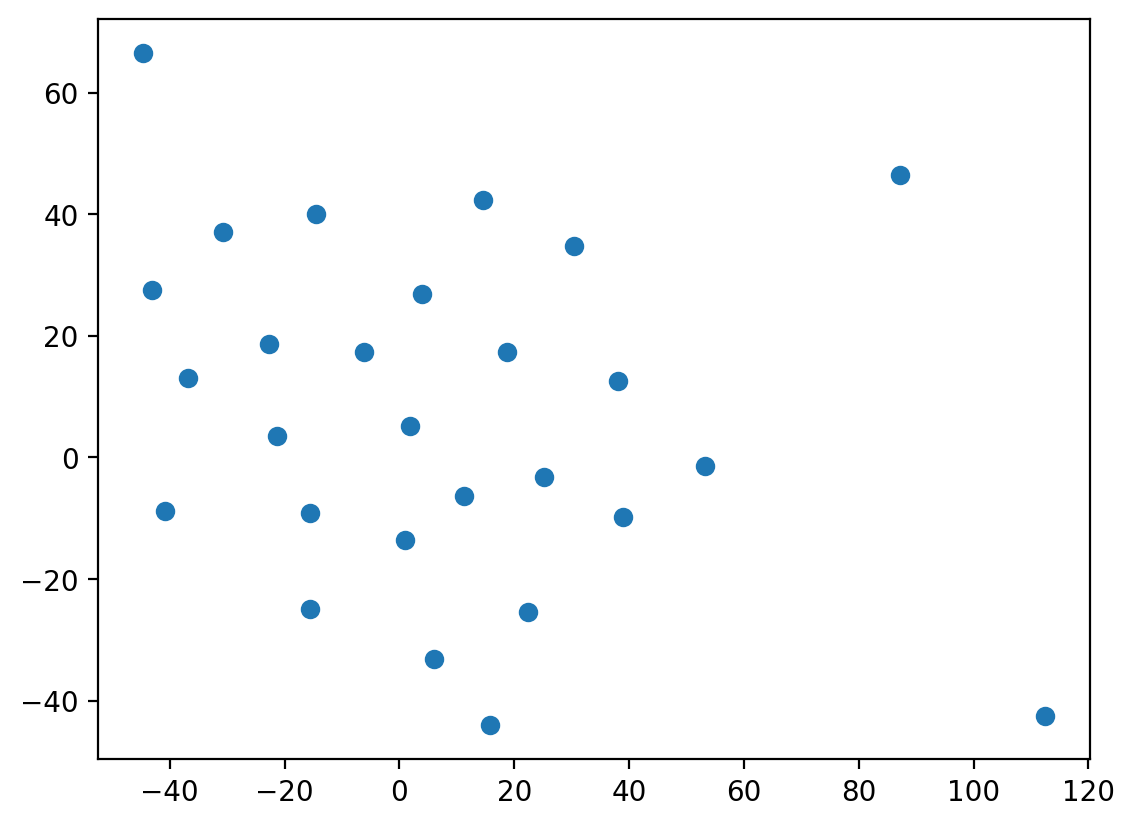

In [8]:
from sklearn.manifold import TSNE

# Get the weights of the Embedding layer
weights = model.layers[0].get_weights()[0]
# print(weights)

# Use t-SNE to reduce the dimensionality of the weights
# Use t-SNE to reduce the dimensionality of the weights
tsne = TSNE(n_components=2, perplexity=min(30, weights.shape[0] - 1))
embeddings = tsne.fit_transform(weights)

# Plot the embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1])

In [10]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [17]:
import streamlit as st

st.title('Next Character Prediction')

user_input = st.text_input('Enter some text')

if st.button('Predict'):
    result = generate_text(user_input)
    st.write(result)

UsageError: Line magic function `%%writefile` not found.


In [14]:
with open('app.py', 'w') as file:
    file.write("""
import streamlit as st
st.title('Hello Streamlit')
""")

In [20]:
!pip install -q streamlit pyngrok



In [22]:
%%writefile app.py
import streamlit as st
st.title('Hello Streamlit')

!streamlit run app.py &>/dev/null&



Overwriting app.py


In [23]:
!pip install -q streamlit pyngrok

In [25]:
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url

ERROR:pyngrok.process.ngrok:t=2024-03-20T17:24:05+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-03-20T17:24:05+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-03-20T17:24:05+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')